In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore') 

## 1. Ingest and Access Data 

reading csv file into pandas dataframe

Note: Due to technical issues in AWS, we had to abort the database instance and hence backed up the data in csv files.

In [2]:
df = pd.read_csv(r'./backup_data/darwin_backup2.csv')

#### Data Overview

In [3]:
df.head()

,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_pass,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,...,platform,train_length,estimated_time,source,actual_time,actual_time_class,is_delayed_arrival,is_delayed_departure,source_instance,estimated_time_minutes
0,202407038081744,P81744,2024-07-03,TD,CCRT,NaN,23:17:00,23:17:30,23:17:00,23:17:00,...,2,NaN,NaN,NaN,NaN,NaN,f,f,NaN,NaN
1,202407038097422,P97422,2024-07-03,TD,ALBNYPK,NaN,23:14:00,23:14:30,23:14:00,23:14:00,...,2,8.0,NaN,NaN,NaN,NaN,f,f,NaN,NaN
2,202407038097422,P97422,2024-07-03,TD,BEXLEY,NaN,23:16:30,23:17:30,23:17:00,23:17:00,...,2,8.0,NaN,NaN,NaN,NaN,f,f,NaN,NaN
3,202407037143658,G43658,2024-07-03,TD,SHAL341,NaN,23:29:00,23:32:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,f,f,NaN,NaN
4,202407037143658,G43658,2024-07-03,TD,SHALFD,NaN,23:34:00,23:35:30,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,f,f,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415067 entries, 0 to 415066
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   route_id                415067 non-null  int64  
 1   unique_id               415067 non-null  object 
 2   service_start_date      415067 non-null  object 
 3   update_origin           404173 non-null  object 
 4   train_platform          415067 non-null  object 
 5   working_time_pass       0 non-null       float64
 6   working_time_arrival    415067 non-null  object 
 7   working_time_departure  415067 non-null  object 
 8   planned_time_arrival    375170 non-null  object 
 9   planned_time_departure  373563 non-null  object 
 10  actual_arrival_time     346352 non-null  object 
 11  actual_departure_time   384274 non-null  object 
 12  platform                388485 non-null  object 
 13  train_length            147550 non-null  float64
 14  estimated_time      

## 2. Data Cleaning and Pre-processing

#### Dropping unnecessary columns

In [5]:
df = df.drop(['working_time_pass','estimated_time','source','actual_time','actual_time_class',
              'source_instance','estimated_time_minutes','working_time_arrival','working_time_departure'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415067 entries, 0 to 415066
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   route_id                415067 non-null  int64  
 1   unique_id               415067 non-null  object 
 2   service_start_date      415067 non-null  object 
 3   update_origin           404173 non-null  object 
 4   train_platform          415067 non-null  object 
 5   planned_time_arrival    375170 non-null  object 
 6   planned_time_departure  373563 non-null  object 
 7   actual_arrival_time     346352 non-null  object 
 8   actual_departure_time   384274 non-null  object 
 9   platform                388485 non-null  object 
 10  train_length            147550 non-null  float64
 11  is_delayed_arrival      415067 non-null  object 
 12  is_delayed_departure    415067 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 41.2+ MB


#### Checking for duplicates and dropping them as necessary

In [6]:
df.duplicated().sum()

16889

In [7]:
df = df.drop_duplicates()
df.duplicated().sum()

0

#### Reading in a rail reference file to extract the station names for every route

In [8]:
df2 = pd.read_csv("RailReferences.csv")
df2.head()

,AtcoCode,TiplocCode,CrsCode,StationName,StationNameLang,GridType,Easting,Northing,CreationDateTime,ModificationDateTime,RevisionNumber,Modification
0,9100PENZNCE,PENZNCE,PNZ,Penzance Rail Station,NaN,U,147588,30599,2003-11-04T00:00:00,2011-09-30T14:47:28,2,rev
1,9100STIVES,STIVES,SIV,St Ives (Cornwall) Rail Station,NaN,U,151947,40127,2005-04-04T00:00:00,2011-09-30T14:47:28,4,rev
2,9100CARBISB,CARBISB,CBB,Carbis Bay Rail Station,NaN,U,152930,38745,2003-11-04T00:00:00,2011-09-30T14:47:28,5,rev
3,9100STERTH,STERTH,SER,St Erth Rail Station,NaN,U,154150,35730,2003-11-04T00:00:00,2007-02-13T17:06:21,3,rev
4,9100LELANTS,LELANTS,LTS,Lelant Saltings Rail Station,NaN,U,154430,36640,2003-11-04T00:00:00,2011-09-30T14:47:28,2,rev


#### Dropping Unnecessary columns

In [9]:
df2 = df2.drop(["StationNameLang","GridType","AtcoCode","Modification","CreationDateTime","ModificationDateTime","RevisionNumber","CrsCode"],axis=1)
df2

,TiplocCode,StationName,Easting,Northing
0,PENZNCE,Penzance Rail Station,147588,30599
1,STIVES,St Ives (Cornwall) Rail Station,151947,40127
2,CARBISB,Carbis Bay Rail Station,152930,38745
3,STERTH,St Erth Rail Station,154150,35730
4,LELANTS,Lelant Saltings Rail Station,154430,36640
...,...,...,...,...
2623,SMRLYTN,Somerleyton Rail Station,647930,296530
2624,OULTNBS,Oulton Broad South Rail Station,651920,292205
2625,YARMTH,Great Yarmouth Rail Station,652000,308100
2626,OULTNBN,Oulton Broad North Rail Station,652420,293140


### Merging the rail reference dataframe and main dataframes 

In [10]:
merged_df = pd.merge(df, df2, left_on='train_platform', right_on='TiplocCode', how='left')

#### Dropping the tiplocCode column 

In [11]:
df = merged_df.drop(["TiplocCode"],axis = 1)

In [12]:
df.head()

,route_id,unique_id,service_start_date,update_origin,train_platform,planned_time_arrival,planned_time_departure,actual_arrival_time,actual_departure_time,platform,train_length,is_delayed_arrival,is_delayed_departure,StationName,Easting,Northing
0,202407038081744,P81744,2024-07-03,TD,CCRT,23:17:00,23:17:00,NaN,23:17:00,2,NaN,f,f,Cathcart Rail Station,258460.0,660580.0
1,202407038097422,P97422,2024-07-03,TD,ALBNYPK,23:14:00,23:14:00,NaN,NaN,2,8.0,f,f,Albany Park Rail Station,547855.0,172860.0
2,202407038097422,P97422,2024-07-03,TD,BEXLEY,23:17:00,23:17:00,23:18:00,23:19:00,2,8.0,f,f,Bexley Rail Station,549380.0,173435.0
3,202407037143658,G43658,2024-07-03,TD,SHAL341,NaN,NaN,23:30:00,23:31:00,NaN,NaN,f,f,NaN,NaN,NaN
4,202407037143658,G43658,2024-07-03,TD,SHALFD,NaN,NaN,23:33:00,23:34:00,NaN,NaN,f,f,Shalford (Surrey) Rail Station,500200.0,147100.0


#### Checking for nulls

In [13]:
df.isna().sum()

route_id                       0
unique_id                      0
service_start_date             0
update_origin               9397
train_platform                 0
planned_time_arrival       39538
planned_time_departure     40855
actual_arrival_time        67315
actual_departure_time      29395
platform                   25850
train_length              255400
is_delayed_arrival             0
is_delayed_departure           0
StationName                30672
Easting                    30672
Northing                   30672
dtype: int64

#### Dropping the nulls in Easting and Northing before converting them to Latitude and Longitude

In [14]:
df = df.dropna(subset=['Easting', 'Northing'])

#### Installing bng_latlon package to convert northing and easting to latitude and longitude


In [15]:
# !pip install bng_latlon

#### Creating a user defined function to convert easting and northing values to longitude and latitude and writing to new columns

In [16]:
from bng_latlon import OSGB36toWGS84
def latlong(df):
    lat_long = []
    for i in range(len(df)):
        lat_long.append( OSGB36toWGS84(df[i][0],df[i][1]) )
    return lat_long
df['Easting'] = df['Easting'].astype('int64')
df['Northing'] = df['Northing'].astype('int64')
df1 = df [['Easting','Northing']]
values = (df1.values)
lat_long = latlong(values)
#Writing to dataframe
lat = []
long = []
for i in range(len(lat_long)):
    lat.append(lat_long[i][0])
    long.append(lat_long[i][1])
    
df['Latitude'] = lat
df['Longitude'] = long

#### Creating a new dataframe that drops all null values

In [17]:
na_df = df.dropna()

In [18]:
df = na_df

In [19]:
#getting an overview of the amount of rows dropped and if we should continue with the null dropped dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103887 entries, 2 to 395480
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   route_id                103887 non-null  int64  
 1   unique_id               103887 non-null  object 
 2   service_start_date      103887 non-null  object 
 3   update_origin           103887 non-null  object 
 4   train_platform          103887 non-null  object 
 5   planned_time_arrival    103887 non-null  object 
 6   planned_time_departure  103887 non-null  object 
 7   actual_arrival_time     103887 non-null  object 
 8   actual_departure_time   103887 non-null  object 
 9   platform                103887 non-null  object 
 10  train_length            103887 non-null  float64
 11  is_delayed_arrival      103887 non-null  object 
 12  is_delayed_departure    103887 non-null  object 
 13  StationName             103887 non-null  object 
 14  Easting                 1

After dropping data we are left with ~100,000 datapoints which is ~25% of our total data we started. Observing the volume of the data, we believe this is significant for our analysis.

### Correcting column data types

#### Changing the column type of the route_id appropriately for further analysis

In [20]:
df['route_id'] = df['route_id'].astype(str)

#### Changing the column type of the is_delayed_arrival and is_delayed_departure to boolean

In [21]:
df['is_delayed_arrival'] = np.where(df['is_delayed_arrival'] == "f", False, True)

In [22]:
df['is_delayed_arrival'].value_counts()

is_delayed_arrival
False    94854
True      9033
Name: count, dtype: int64

In [23]:
df['is_delayed_arrival'].dtype

dtype('bool')

In [24]:
df['is_delayed_departure'] = np.where(df['is_delayed_departure'] == "f", False, True)

In [25]:
df['is_delayed_departure'].value_counts()

is_delayed_departure
False    94850
True      9037
Name: count, dtype: int64

In [26]:
df['is_delayed_departure'].dtype

dtype('bool')

#### Changing all dates or time columns to the correct data type.

In [27]:
from datetime import time
#changing the columns with dates to datetime objects
df['service_start_date'] = pd.to_datetime(df['service_start_date'])
df['planned_time_arrival'] = pd.to_datetime(df['planned_time_arrival'], format='%H:%M:%S').dt.time
df['planned_time_departure'] = pd.to_datetime(df['planned_time_departure'], format='%H:%M:%S').dt.time
df['actual_arrival_time'] = pd.to_datetime(df['actual_arrival_time'], format='%H:%M:%S').dt.time
df['actual_departure_time'] = pd.to_datetime(df['actual_departure_time'], format='%H:%M:%S').dt.time

#### Converting all time columns to datetime objects with the service_start_date as the date combined with the timestamp

In [28]:
from datetime import datetime
from datetime import timedelta
df['actual_departure_time'] = df.apply(lambda row: datetime.combine(row['service_start_date'].date(), row['actual_departure_time']), axis=1)
df['planned_time_departure'] = df.apply(lambda row: datetime.combine(row['service_start_date'].date(), row['planned_time_departure']), axis=1)
df['planned_time_arrival'] = df.apply(lambda row: datetime.combine(row['service_start_date'].date(), row['planned_time_arrival']), axis=1)
df['actual_arrival_time'] = df.apply(lambda row: datetime.combine(row['service_start_date'].date(), row['actual_arrival_time']), axis=1)

In [29]:
df.dtypes

route_id                          object
unique_id                         object
service_start_date        datetime64[ns]
update_origin                     object
train_platform                    object
planned_time_arrival      datetime64[ns]
planned_time_departure    datetime64[ns]
actual_arrival_time       datetime64[ns]
actual_departure_time     datetime64[ns]
platform                          object
train_length                     float64
is_delayed_arrival                  bool
is_delayed_departure                bool
StationName                       object
Easting                            int64
Northing                           int64
Latitude                         float64
Longitude                        float64
dtype: object

#### Creating user defined functions to check for cases of dates arrival times or actual departure times taking place the day after the service start day, and add a day to the column values

In [30]:
from datetime import datetime
from datetime import timedelta

#Adding service_start_date to time objects to get a datetime for every time column
def change_actual_departure(row):
    #Check if times occur after the initial service start day and correcting their date to the next day
    if row['actual_departure_time'] < row['planned_time_departure']: 
        return row['actual_departure_time'] + timedelta(days=1)
    return row['actual_departure_time']

def change_arrival(row):
    #Check if times occur after the initial service start day and correcting their date to the next day
    if row['actual_arrival_time'] < row['planned_time_arrival']: 
        return row['actual_arrival_time'] + timedelta(days=1)
    return row['actual_arrival_time']

df['actual_departure_time'] = df.apply(change_actual_departure, axis=1)
df['actual_arrival_time'] = df.apply(change_arrival, axis=1)

#### Creating a calculated time difference column for calculating delayed departure and arrival minutes

In [31]:
df['actual_vs_planned_arrival'] = df['actual_arrival_time'] - df['planned_time_arrival']
df['actual_vs_planned_departure'] = df['actual_departure_time'] - df['planned_time_departure']

#### Creating delayed arrival and delayed departure minutes column

In [32]:
df['delayed_arrival_min'] = (df['actual_vs_planned_arrival'].dt.total_seconds() / 60)
df['delayed_departure_min'] = (df['actual_vs_planned_departure'].dt.total_seconds() / 60)

#### Function to calculate origin and destination for each trip

In [33]:
def calculate_origin_destination(group):
    origin = group.iloc[0]['StationName']
    destination = group.iloc[-1]['StationName']
    return pd.Series({
        'Origin': origin,
        'Destination': destination
    })

# Group by route_id, unique_id, and service_start_date, then apply the function to calculate origin and destination
origin_destination = df.groupby(['route_id', 'unique_id', 'service_start_date']).apply(calculate_origin_destination).reset_index()

#Joining into original dataframe
df = df.merge(origin_destination, on=['route_id', 'unique_id', 'service_start_date'], how='left')

#### Getting an overview of the data before exporting to csv file.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103887 entries, 0 to 103886
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype          
---  ------                       --------------   -----          
 0   route_id                     103887 non-null  object         
 1   unique_id                    103887 non-null  object         
 2   service_start_date           103887 non-null  datetime64[ns] 
 3   update_origin                103887 non-null  object         
 4   train_platform               103887 non-null  object         
 5   planned_time_arrival         103887 non-null  datetime64[ns] 
 6   planned_time_departure       103887 non-null  datetime64[ns] 
 7   actual_arrival_time          103887 non-null  datetime64[ns] 
 8   actual_departure_time        103887 non-null  datetime64[ns] 
 9   platform                     103887 non-null  object         
 10  train_length                 103887 non-null  float64        
 11  is_delayed_ar

In [35]:
df.head()

,route_id,unique_id,service_start_date,update_origin,train_platform,planned_time_arrival,planned_time_departure,actual_arrival_time,actual_departure_time,platform,...,Easting,Northing,Latitude,Longitude,actual_vs_planned_arrival,actual_vs_planned_departure,delayed_arrival_min,delayed_departure_min,Origin,Destination
0,202407038097422,P97422,2024-07-03,TD,BEXLEY,2024-07-03 23:17:00,2024-07-03 23:17:00,2024-07-03 23:18:00,2024-07-03 23:19:00,2,...,549380,173435,51.440218,0.147903,0 days 00:01:00,0 days 00:02:00,1.0,2.0,Bexley Rail Station,Bexley Rail Station
1,202407037139898,G39898,2024-07-03,CIS,BOXHAWH,2024-07-03 23:18:00,2024-07-03 23:18:00,2024-07-03 23:18:00,2024-07-03 23:18:00,1,...,516744,151865,51.254010,-0.328490,0 days 00:00:00,0 days 00:00:00,0.0,0.0,Box Hill & Westhumble Rail Station,Box Hill & Westhumble Rail Station
2,202407037154196,G54196,2024-07-03,CIS,HYWRDSH,2024-07-03 23:16:00,2024-07-03 23:17:00,2024-07-03 23:17:00,2024-07-03 23:18:00,3,...,533045,124630,51.005680,-0.105078,0 days 00:01:00,0 days 00:01:00,1.0,1.0,Haywards Heath Rail Station,Three Bridges Rail Station
3,202407037154196,G54196,2024-07-03,CIS,THBDGS,2024-07-03 23:28:00,2024-07-03 23:29:00,2024-07-03 23:29:00,2024-07-03 23:30:00,4,...,528800,136900,51.116922,-0.161184,0 days 00:01:00,0 days 00:01:00,1.0,1.0,Haywards Heath Rail Station,Three Bridges Rail Station
4,202407037150851,G50851,2024-07-03,TD,HRPNDN,2024-07-03 23:22:00,2024-07-03 23:22:00,2024-07-03 23:22:00,2024-07-03 23:22:00,2,...,513735,214175,51.814643,-0.351481,0 days 00:00:00,0 days 00:00:00,0.0,0.0,Harpenden Rail Station,Luton Airport Parkway Rail Station


#### Exporting the dataframe into a csv file for use in PowerBI or other requirements

In [36]:
df.to_csv('./Data/cleanRailData.csv', index=False)

## 3. Data Visualization

In [37]:
#importing libraries
import matplotlib.pyplot as plt
import seaborn as sns

### Distribution of Categorical and Numerical Data


#### Numerical Data

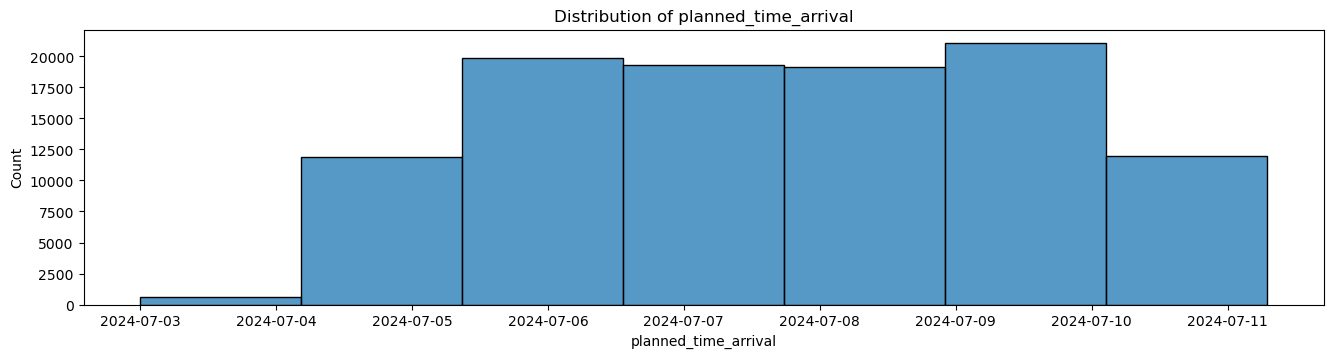

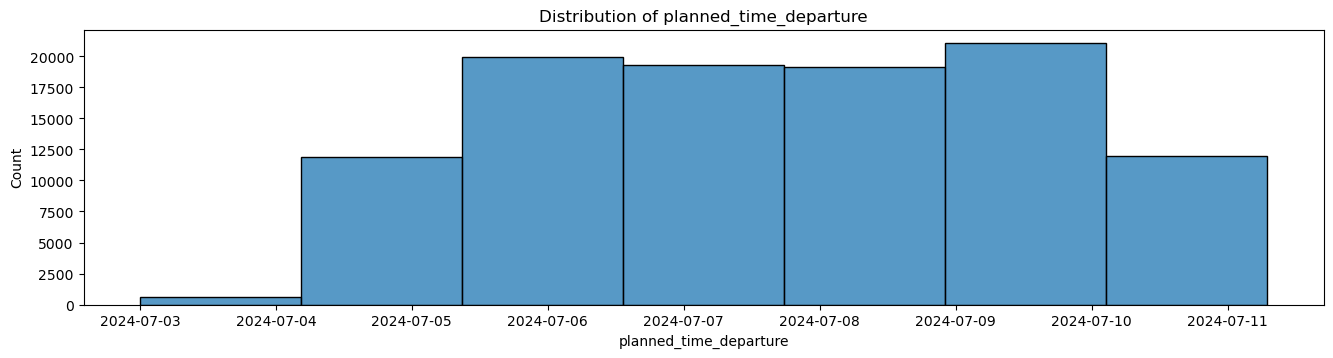

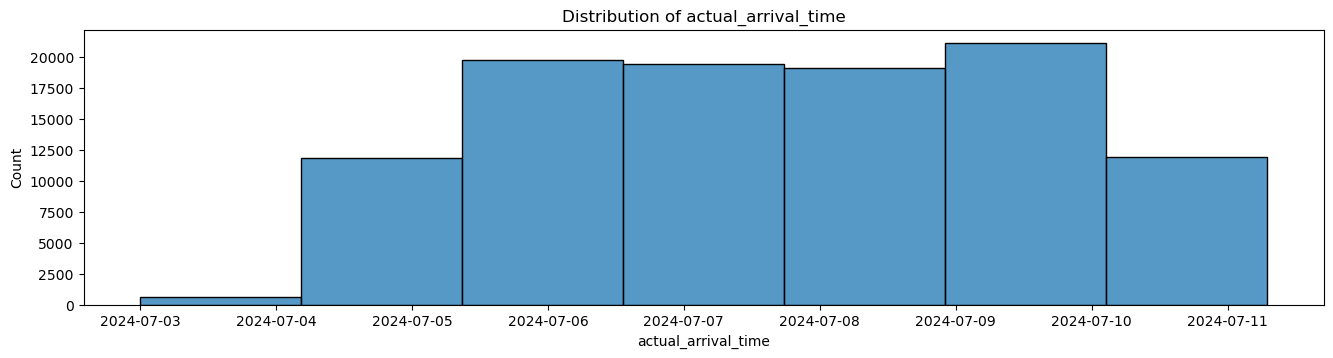

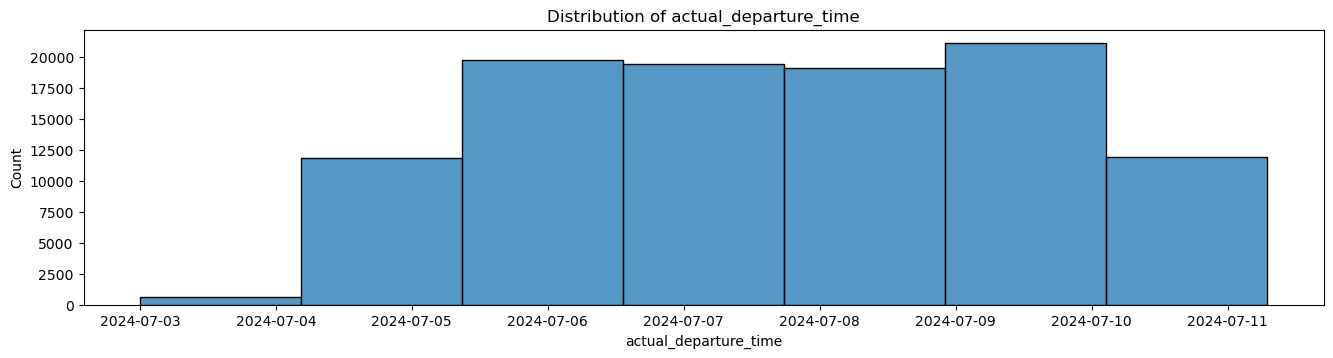

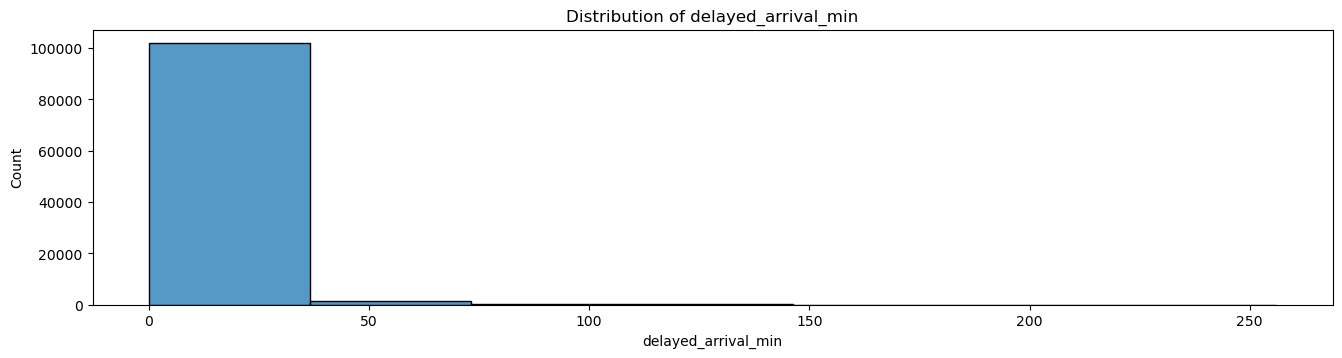

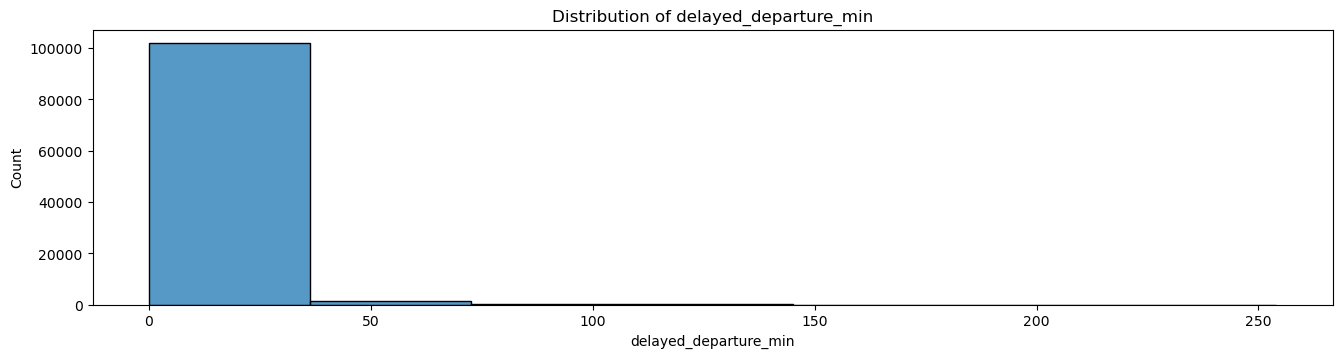

In [38]:
numerical_cols = ['planned_time_arrival', 'planned_time_departure', 'actual_arrival_time', 'actual_departure_time', 
                  'delayed_arrival_min', 'delayed_departure_min']
subplot_index = 1
for col in numerical_cols:
    plt.figure(figsize=(16, 25))
    plt.subplot(len(numerical_cols),1,subplot_index)
    sns.histplot(df[col], bins=7)
    plt.title(f'Distribution of {col}')
    plt.show()

#### Categorical data

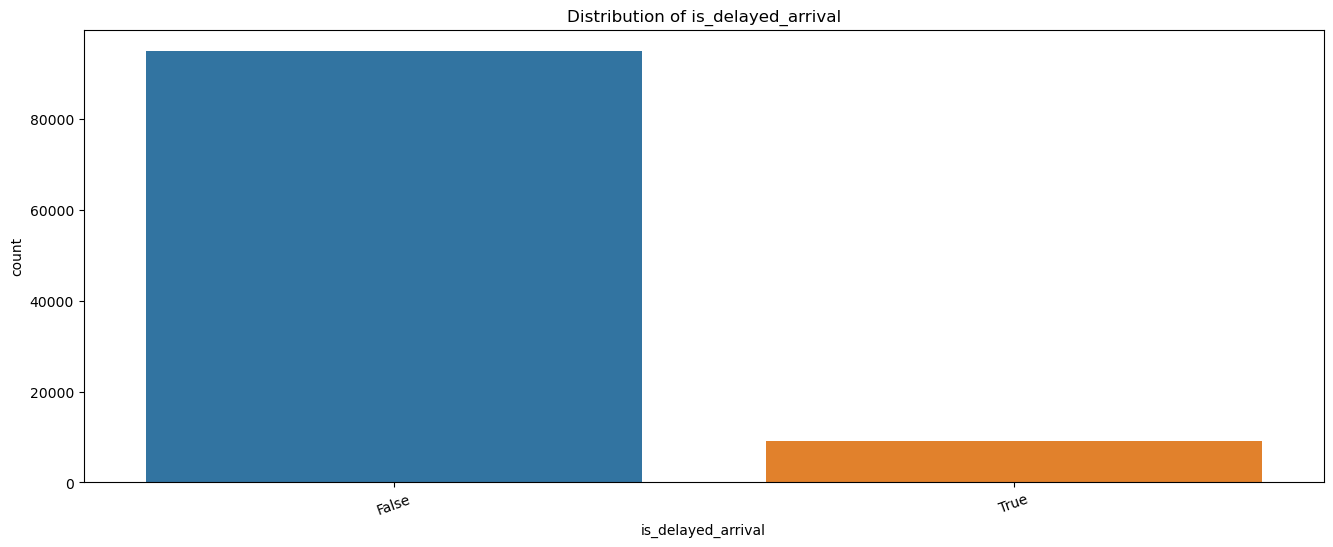

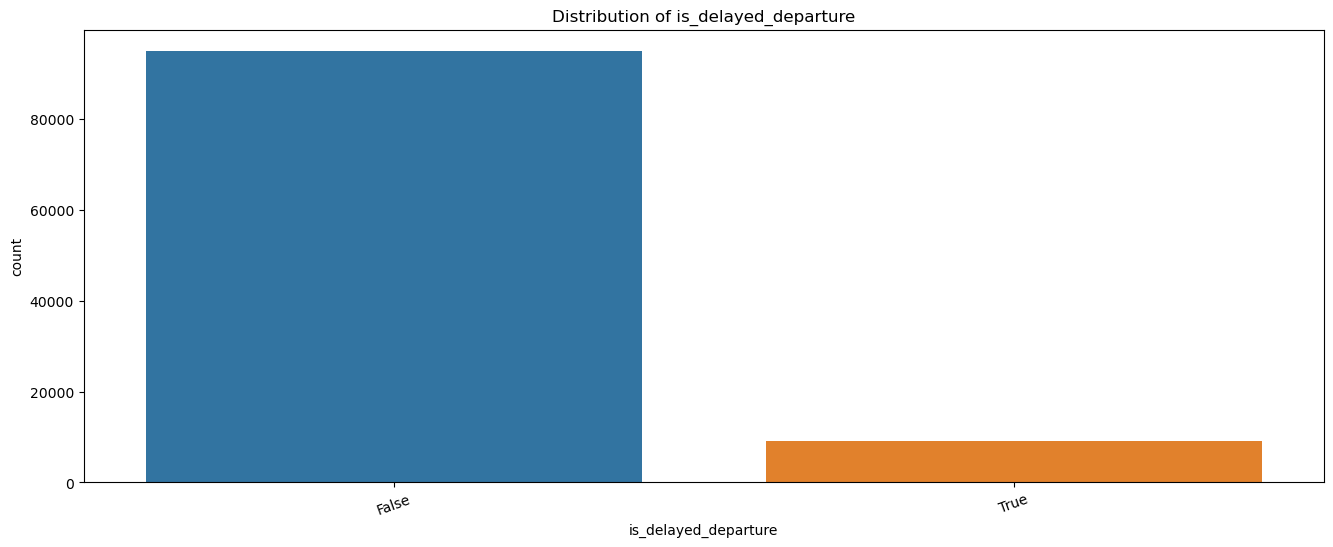

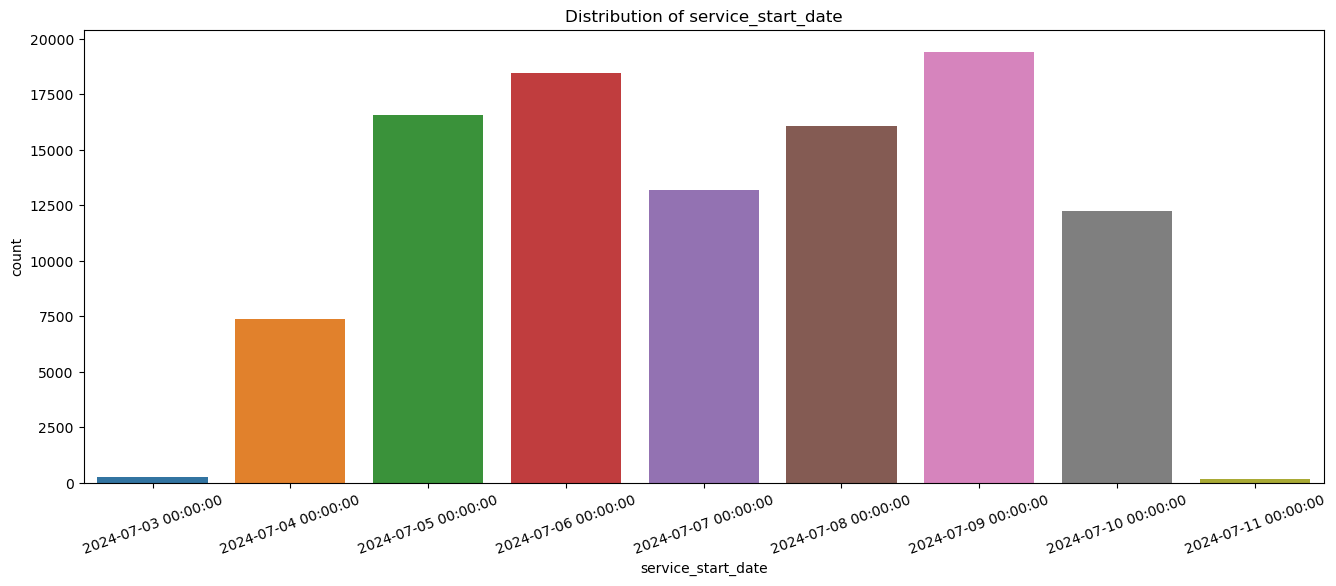

In [39]:
categorical_cols = ['is_delayed_arrival', 'is_delayed_departure','service_start_date']
#histograms for categorical variables
subplot_index = 1
for col in categorical_cols:
    plt.figure(figsize=(16, 20))
    plt.subplot(len(categorical_cols),1,subplot_index)
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation = 20)
    plt.show()

### What is the distribution of if there is an actual delay in arrival and departure?

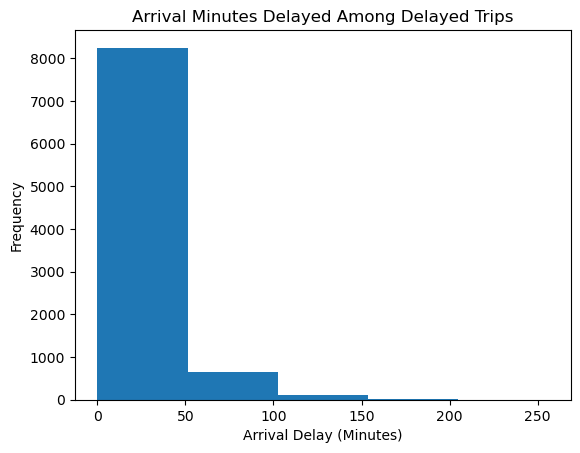

In [40]:
#creating a df with only delayed arrival trains
delayed_arrivals = df[df['is_delayed_arrival'] == True]
# Plotting the histogram using matplotlib
plt.hist(delayed_arrivals['delayed_arrival_min'], bins=5)

# Adding titles and labels
plt.title('Arrival Minutes Delayed Among Delayed Trips')
plt.xlabel('Arrival Delay (Minutes)')
plt.ylabel('Frequency')
plt.show()

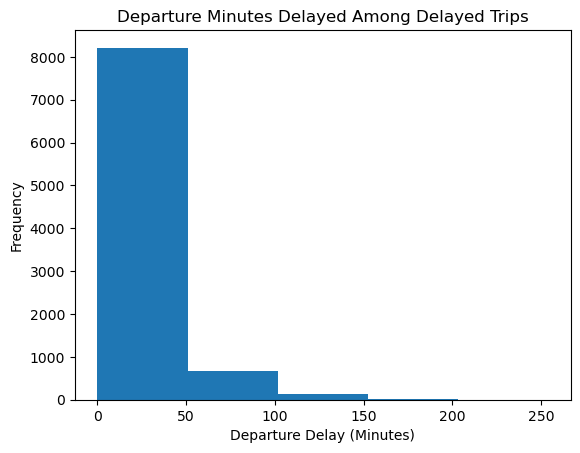

In [41]:
#creating a df with only delayed departure trains
delayed_departures = df[df['is_delayed_departure'] == True]
# Plotting the histogram using matplotlib
plt.hist(delayed_arrivals['delayed_departure_min'], bins=5)

# Adding titles and labels
plt.title('Departure Minutes Delayed Among Delayed Trips')
plt.xlabel('Departure Delay (Minutes)')
plt.ylabel('Frequency')
plt.show()

### Correlation Analysis among numerical data

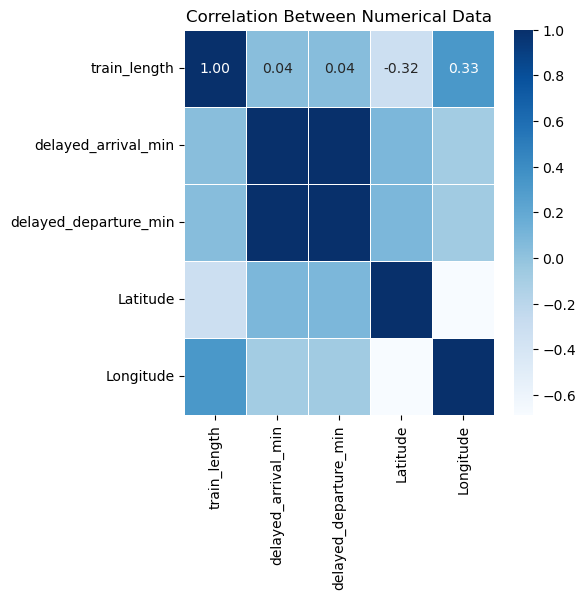

In [42]:
df1 = df[['train_length', 'delayed_arrival_min', 'delayed_departure_min', 'Latitude', 'Longitude']]
corr_matrix = df1.corr()

# Create a correlation heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Numerical Data')
plt.show()

We found an absolute correlation between arrival delay and departure delay and decided to make a scatter plot to visualize the impact of Departure Delay on Arrival time.

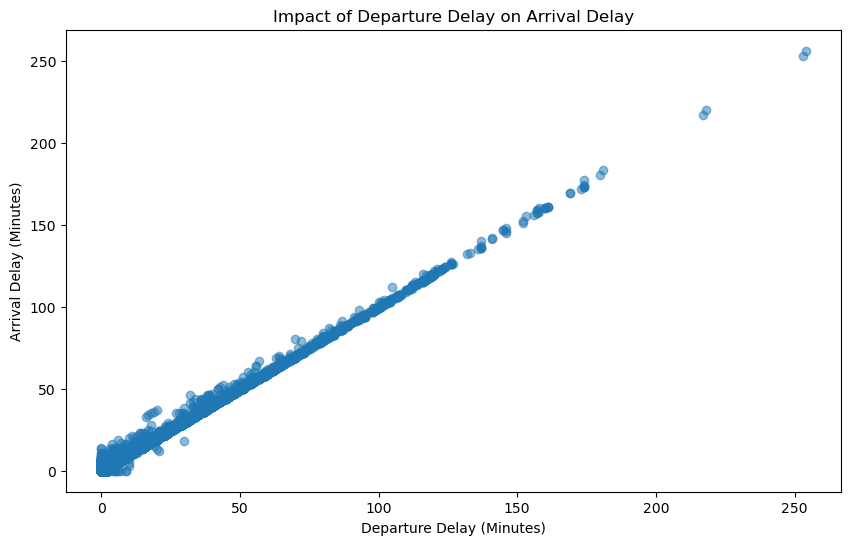

In [43]:
plt.figure(figsize=(10,6))
plt.scatter(df['delayed_departure_min'], df['delayed_arrival_min'], alpha=0.5)
plt.xlabel('Departure Delay (Minutes)')
plt.ylabel('Arrival Delay (Minutes)')
plt.title('Impact of Departure Delay on Arrival Delay')
plt.show()

This strong correlation of 1.00 shows that departure delay is significantly impacting the arrival time.

### 4. Analysis

Gathered external data to find insights for our questions.

Source: https://dataportal.orr.gov.uk/

### 1. Which stations are the most Busiest accessed by public? 

In [23]:
df2 = pd.read_excel('2.Passenger_population_station_TOC_2023.xlsx')

In [24]:
df2.head()

,StationName,Entry_exit_population,origin_or_destination,Region,Operator
0,Abbey Wood,7118664,Tottenham Court Road,London,Elizabeth line
1,Aber,103976,Cardiff Central,Wales,TfW Rail
2,Abercynon,134880,Cardiff Central,Wales,TfW Rail
3,Aberdare,226714,Cardiff Central,Wales,TfW Rail
4,Aberdeen,1961414,Edinburgh,Scotland,ScotRail


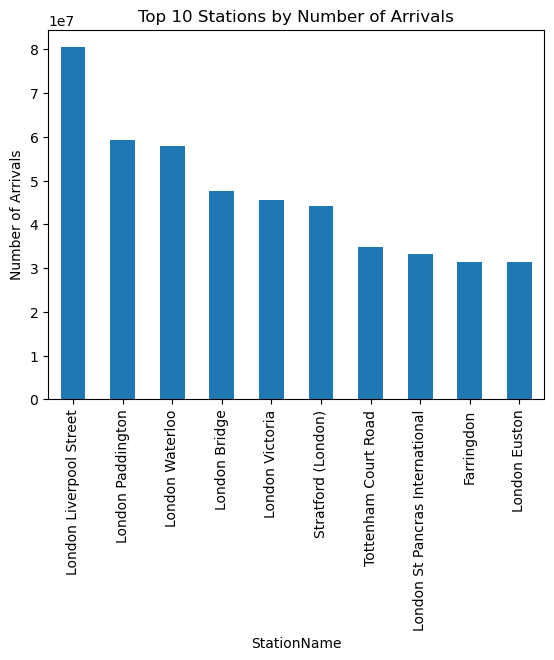

In [47]:
#plot here
#sort by top 10 or 20 stations according to the plot output

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df2 = pd.read_excel('2.Passenger_population_station_TOC_2023.xlsx')

# Aggregate data by 'StationName' and sum the values
agg_data = df2.groupby('StationName').sum()

# Sort data by the 'Entry_exit_population' column in descending order
sorted_data = agg_data.sort_values(by='Entry_exit_population', ascending=False)

# Select the top 10 stations
top_10_stations = sorted_data.head(10)

# Plot the data
top_10_stations.plot(kind='bar', y='Entry_exit_population', legend=False)
plt.xlabel('StationName')
plt.ylabel('Number of Arrivals')
plt.title('Top 10 Stations by Number of Arrivals')
plt.show()

### 2. Which is the most Busiest Region accessed by public?

In [47]:
#Use the same dataframe as above

In [ ]:
df2 = pd.read_excel('2.Passenger_population_station_TOC_2023.xlsx')

In [28]:
df2.head()

,StationName,Entry_exit_population,origin_or_destination,Region,Operator
0,Abbey Wood,7118664,Tottenham Court Road,London,Elizabeth line
1,Aber,103976,Cardiff Central,Wales,TfW Rail
2,Abercynon,134880,Cardiff Central,Wales,TfW Rail
3,Aberdare,226714,Cardiff Central,Wales,TfW Rail
4,Aberdeen,1961414,Edinburgh,Scotland,ScotRail


Index(['StationName', 'Entry_exit_population', 'origin_or_destination',
       'Region', 'Operator'],
      dtype='object')


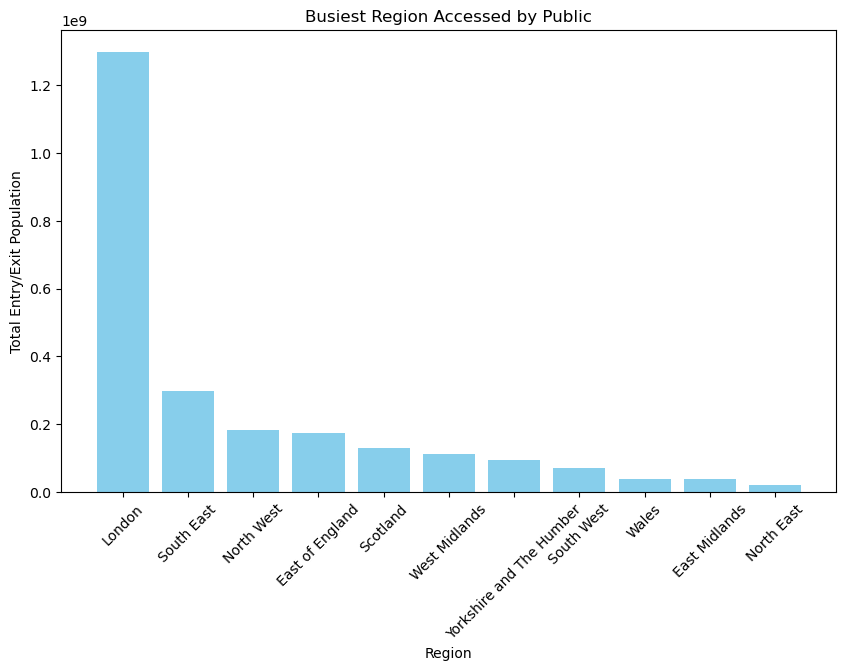

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_excel('2.Passenger_population_station_TOC_2023.xlsx')

print(df.columns)

df.columns = df.columns.str.strip()

# Aggregate data by region
region_summary = df.groupby('Region')['Entry_exit_population'].sum().reset_index()

# Sort by Entry_exit_population in descending order
region_summary = region_summary.sort_values(by='Entry_exit_population', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(region_summary['Region'], region_summary['Entry_exit_population'], color='skyblue')
plt.xlabel('Region')
plt.ylabel('Total Entry/Exit Population')
plt.title('Busiest Region Accessed by Public')
plt.xticks(rotation=45)
plt.show()

### 3. Which Railway Operators are controlling more stations?

In [70]:
df3 = pd.read_excel('1.Train_Operating_Company_Stations_list_2023.xlsx')

In [49]:
df3.head()

,Operator,Stations_associated(As of 31 March 2023)
0,Avanti West Coast,16
1,c2c,25
2,Caledonian Sleeper \n,0
3,Chiltern Railways,35
4,CrossCountry,0


Index(['Operator', 'Stations_associated(As of 31 March 2023)'], dtype='object')


<Figure size 1500x800 with 0 Axes>

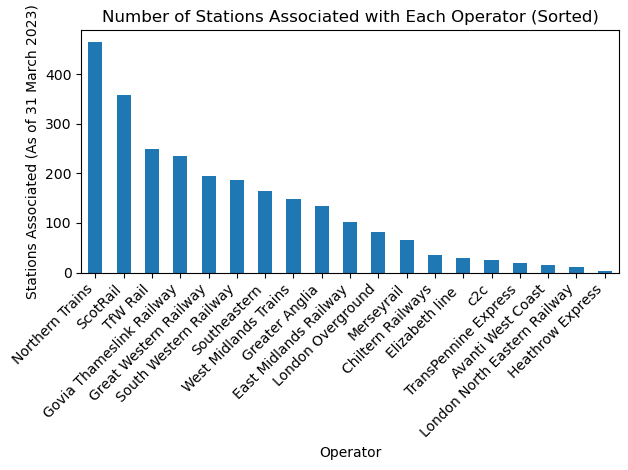

In [91]:
#plot here
#sort descending

import pandas as pd
import matplotlib.pyplot as plt

df3 = pd.read_excel('1.Train_Operating_Company_Stations_list_2023.xlsx')

print(df3.columns)

filtered_df3 = df3[(df3 != 0).all(axis=1)]

sorted_df3 = filtered_df3.sort_values(by=['Stations_associated(As of 31 March 2023)', 'Operator'], ascending=[False, True])

# Plot the data
plt.figure(figsize=(15, 8))
sorted_df3.plot(kind='bar', x='Operator', y='Stations_associated(As of 31 March 2023)', legend=False)
plt.xlabel('Operator')
plt.ylabel('Stations Associated (As of 31 March 2023)')
plt.title('Number of Stations Associated with Each Operator (Sorted)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 4. Railways usage by Public over the years

In [126]:
df4 = pd.read_excel('4.Passenger_population_1997_2023Mar.xlsx')

In [127]:
df4.head()

,Station name,Region,1997,1998,1999,2000,2001,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Abbey Wood,London,2060584,2284585.024,2355943.019,2443651.187,2400216,2425400.0,NaN,2201541.0,...,3282240.0,3319408.0,2929472.0,2988802.0,3124850.0,3769402.0,3825206.0,1412638.0,2638456.0,7118664.0
1,Aber,Wales,88714,87910,112812,115079,115667,134397.0,NaN,134191.0,...,219868.0,212546.0,214996.0,227270.0,251108.0,245218.0,228480.0,15712.0,73642.0,103976.0
2,Abercynon,Wales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,251688.0,265458.0,275404.0,293638.0,298358.0,289008.0,282886.0,33006.0,105822.0,134880.0
3,Abercynon North,NaN,43073,42890,47417,52014,62184,82961.0,NaN,112811.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Abercynon South,NaN,51191,49553,56520,67107,72290,68360.0,NaN,92256.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2650 entries, 0 to 2649
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Station name  2650 non-null   object 
 1   Region        2579 non-null   object 
 2   1997          2533 non-null   object 
 3   1998          2526 non-null   object 
 4   1999          2500 non-null   object 
 5   2000          2499 non-null   object 
 6   2001          2496 non-null   object 
 7   2002          2495 non-null   float64
 8   2003          0 non-null      float64
 9   2004          2501 non-null   float64
 10  2005          2507 non-null   object 
 11  2006          2525 non-null   object 
 12  2007          2534 non-null   object 
 13  2008          2518 non-null   float64
 14  2009          2525 non-null   float64
 15  2010          2531 non-null   float64
 16  2011          2533 non-null   float64
 17  2012          2535 non-null   float64
 18  2013          2537 non-null 

In [129]:
df4.isna().sum()

Station name       0
Region            71
1997             117
1998             124
1999             150
2000             151
2001             154
2002             155
2003            2650
2004             149
2005             143
2006             125
2007             116
2008             132
2009             125
2010             119
2011             117
2012             115
2013             113
2014             111
2015              97
2016              94
2017              91
2018              89
2019              83
2020              82
2021              82
2022              74
dtype: int64

In [124]:
import pandas as pd

df4 = pd.read_excel('4.Passenger_population_1997_2023Mar.xlsx')

#print(df4.head())

rows_to_drop = ['Abercynon', 'Abercynon North', 'Abercynon South']

df4 = df4[~df4['Station name'].isin(rows_to_drop)]
df4.head()
#print(df4[df4['Station name'].isin(rows_to_drop)])

,Station name,Region,1997,1998,1999,2000,2001,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Abbey Wood,London,2060584,2284585.024,2355943.019,2443651.187,2400216,2425400.0,NaN,2201541.0,...,3282240.0,3319408.0,2929472.0,2988802.0,3124850.0,3769402.0,3825206.0,1412638.0,2638456.0,7118664.0
1,Aber,Wales,88714,87910,112812,115079,115667,134397.0,NaN,134191.0,...,219868.0,212546.0,214996.0,227270.0,251108.0,245218.0,228480.0,15712.0,73642.0,103976.0
5,Aberdare,Wales,158945,178680,219986,260244,302859,331006.0,NaN,464026.0,...,557992.0,551928.0,566904.0,569364.0,571746.0,555780.0,504622.0,53668.0,177350.0,226714.0
6,Aberdeen,Scotland,1550570,1590804,1609251,1607702,1762708,1761041.0,NaN,1931973.0,...,3599431.0,3742646.0,3459944.0,3058268.0,2948150.0,2616142.0,2497108.0,393982.0,1536720.0,1961414.0
7,Aberdour,Scotland,78964,87940,95220,103545,95850,96376.0,NaN,112941.0,...,127470.0,129474.0,127312.0,125208.0,135240.0,140048.0,126340.0,14726.0,62990.0,78952.0


In [143]:
import pandas as pd
import matplotlib.pyplot as plt

df4 = pd.read_excel('4.Passenger_population_1997_2023Mar.xlsx')

df4 = df4.drop(columns=['Region'])

# Sum the values for each year across all stations
yearly_totals = df4.sum(numeric_only=True)
yearly_totals
# # Plotting the data
# plt.figure(figsize=(14, 8))
# plt.plot(yearly_totals.index, yearly_totals.values, marker='o')
# plt.title('Railways Usage by Public Over the Years')
# plt.xlabel('Year')
# plt.ylabel('Total Usage')
# plt.xlim(1997, 2022)
# plt.grid(True)
# plt.show()

2002    1.503090e+09
2003    0.000000e+00
2004    1.562256e+09
2008    2.147508e+09
2009    2.130773e+09
2010    2.313793e+09
2011    2.455920e+09
2012    2.537959e+09
2013    2.665124e+09
2014    2.785071e+09
2015    2.927554e+09
2016    2.939351e+09
2017    2.952231e+09
2018    3.039437e+09
2019    3.007144e+09
2020    6.877328e+08
2021    1.788478e+09
2022    2.462181e+09
dtype: float64

In [93]:
#data cleaning to be done before plotting

/tmp/ipykernel_14810/944310180.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='update_origin', y='count', data=update_origin_counts, palette='viridis')


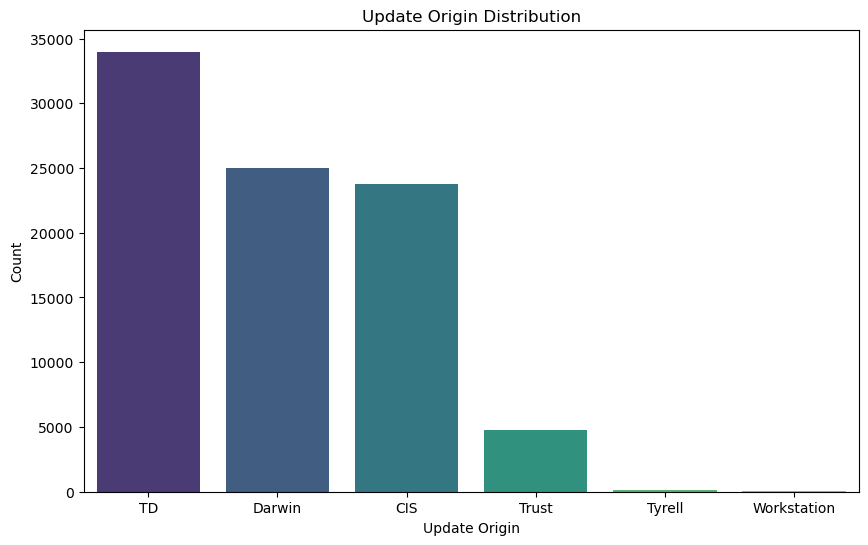

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('cleanRailData.csv')

df = pd.DataFrame(df)

# Count the occurrences of each category
update_origin_counts = df['update_origin'].value_counts().reset_index()
update_origin_counts.columns = ['update_origin', 'count']

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='update_origin', y='count', data=update_origin_counts, palette='viridis')
plt.title('Update Origin Distribution')
plt.xlabel('Update Origin')
plt.ylabel('Count')
plt.show()